<h1 style="font-size:42px; text-align:center; margin-bottom:5px;"><span style="color:tomato">JIG14000 : </span> Final Project</h1>

<h1 style="font-size:22px; text-align:center; margin-bottom:5px;"><span style="color:brown">Topic : </span><b>Telecom Customer Churn</b></h1>
<hr>

<h1 style="font-size:22px; text-align:center; margin-bottom:5px;"><span style="color:steelbue"><u>Table of Contents</u></h1>

1. [Business Prpblem Statement](#problem)
2. [Importing Libraries](#library)
3. [Data Preprocessing](#preprocessing)
4. [Exploratory Data Analysis (EDA)](#eda)
5. [Feature Selection](#selection)
6. [Model trianing and Evaluation](#model)
7. [Comparing Algorithms](#compare)
8. [Conclusion](#conclusion)
<hr>

<span id="problem"></span>
# 1). Business Problem Statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 10-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition. For many incumbent operators, retaining high profitable customers is the number one business goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.
<b>
1. Predicting whether a customer will churn by learning models on the Telecom Industry dataset (Provider : Orange Telco). Predict whether a customer in our dataset will stay with the company(False) or if they will leave/cancel subscription (True) and what are the factors?
2. How does churn depend on calling behavior like call duration, call charge and call time?
3. How does area code or international plan or voice mail plan affect churn?
4. How is customer service call related to churn?
</b>    
<hr>

<span id="library"></span>
# 2). Importing Libraries

In [1]:
import pandas as pd ### library for data processing
import numpy as np ### library for linear algebra
import matplotlib.pyplot as plt ### library to generate plots
import seaborn as sns ### library for visualization
%matplotlib inline 


import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
from IPython.display import Image, display, HTML

import warnings
warnings.simplefilter(action='ignore')

<hr>

<span id="preprocessing"></span>
# 3). Data Preprocessing

In [2]:
# Reading Dataset
df_telecom=pd.read_csv('TelecomChurnDataset.csv',sep=',',header=0, encoding="latin")

#Displying Data
df_telecom.head(5)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
print("Columns :", df_telecom.shape[1])
print("Rows :", df_telecom.shape[0])
print('\n')

Columns : 21
Rows : 3333




In [4]:
# Checking Dataset info
df_telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [5]:
# Checking for null values
df_telecom.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

**Inference : No missing values in the dataset**

In [6]:
# Let's check distribution of Numerical column
df_telecom.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


**Let's replace columns name spaces with underscores(_) for easiness**

In [7]:
#replacing empty space in our columns with underscore

df_telecom.columns = df_telecom.columns.str.replace(' ', '_')
df_telecom.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls', 'churn'],
      dtype='object')

<b>What is the distribution of subscribers by target churn? What is the percentage of loyal subscribers?

In [8]:
df_telecom['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

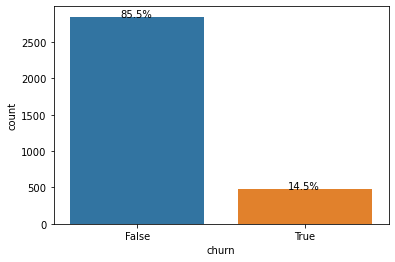

In [9]:
# let's check for churn
ax=sns.countplot(x="churn",data=df_telecom)
for p in ax.patches:
        ax.annotate('{:.1f}%'.format( (p.get_height()/df_telecom.shape[0])*100 ), (p.get_x()+0.3, p.get_height()))

<b>Inference : </b><span style="color:green">As we can see, The number of '0' -> "Not Churn" is 85.5% (loyal customers) and '1' -> "Churned" is 14.4% (tend to leave), Which can leads inconsistency in our Model prediction of Testing data, So will be treating this <b>"Imbalanced Target Column by Sampling (SMOTE: Synthetic Minority Over-sampling Technique) later in the Notebook."</b></span>

In [10]:
# Categoricals columns:
df_telecom.select_dtypes('object').head(4)

,state,phone_number,international_plan,voice_mail_plan
0,KS,382-4657,no,yes
1,OH,371-7191,no,yes
2,NJ,358-1921,no,no
3,OH,375-9999,yes,no


**Let's drop categorical cloumn customer’s phone_number have it doesn't have any great bearing on whether customer's decide to stick with a phone company, so for this reason, I choose to simply drop this column from our feature set**

In [11]:
# lets drop phone number columns
df_telecom = df_telecom.drop(['phone_number'], axis = 1)
df_telecom.select_dtypes('object').head(4)

,state,international_plan,voice_mail_plan
0,KS,no,yes
1,OH,no,yes
2,NJ,no,no
3,OH,yes,no


In [12]:
# number of unique values in area_code
df_telecom['state'].nunique()

51

In [13]:
#Numerical Columns
num_col = df_telecom.select_dtypes('int64','float64')

In [14]:
num_col

,account_length,area_code,number_vmail_messages,total_day_calls,total_eve_calls,total_night_calls,total_intl_calls,customer_service_calls
0,128,415,25,110,99,91,3,1
1,107,415,26,123,103,103,3,1
2,137,415,0,114,110,104,5,0
3,84,408,0,71,88,89,7,2
4,75,415,0,113,122,121,3,3
...,...,...,...,...,...,...,...,...
3328,192,415,36,77,126,83,6,2
3329,68,415,0,57,55,123,4,3
3330,28,510,0,109,58,91,6,2
3331,184,510,0,105,84,137,10,2


In [15]:
df_telecom.head(5)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


<hr>

<span id="eda"></span>
# 3). Exploratory Data Analysis (EDA)

**In EDA, we'll be looking into useful insights**

International plan and Churn

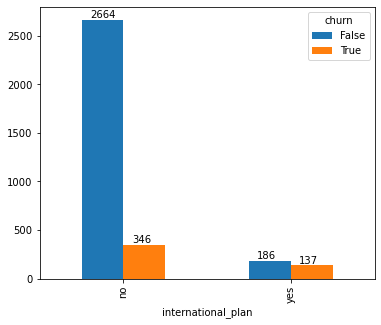

In [16]:
ip=df_telecom.groupby(["international_plan", "churn"]).size().unstack().plot(kind='bar', stacked=False,figsize=(6,5))
for i in ip.patches:
    ip.text(i.get_x()+0.05, i.get_height()+20,str(i.get_height()))

<b>Inference : </b><span style= "color:green">**"international_plan"- While the proportion of churn for customers which have the international plan is much higher than the proportion of churn for customers without.**</span>
<br>

**State-vise Churned and Non-Churned Customers**

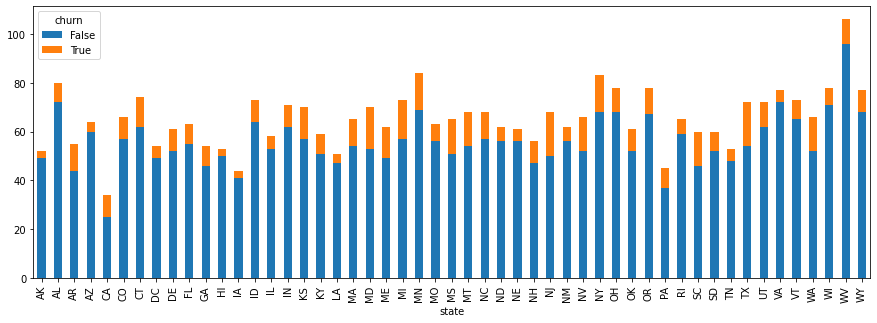

In [17]:
st=df_telecom.groupby(["state", "churn"]).size().unstack().plot(kind='bar',stacked=True,figsize=(15,5))

**Inference : "This shows that we should incorporate the state into our further analysis, because it could be help to predict if a customer is going to churn."**

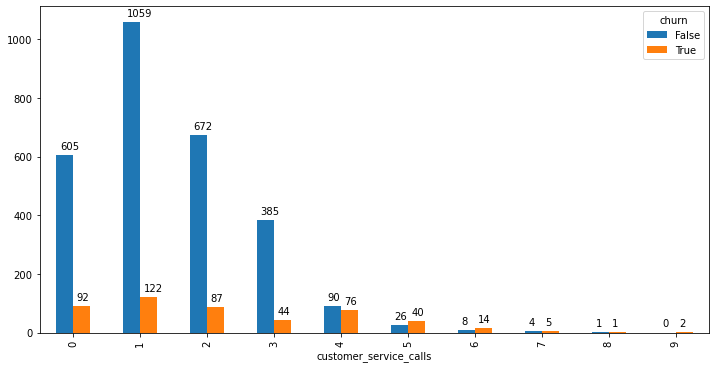

In [18]:
cs=df_telecom.groupby(["customer_service_calls", "churn"]).size().unstack().plot(kind='bar', stacked=False,figsize=(12,6))
for i in cs.patches:
    cs.text(i.get_x()+0.05, i.get_height()+20,int(i.get_height()))

**Number of times Customer makes Customer Service calls.**

Area code and Churn plot

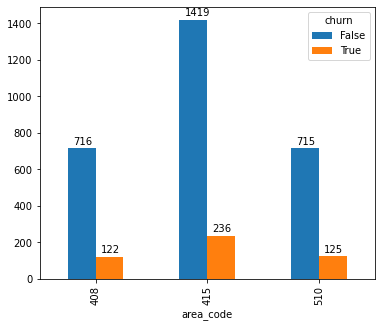

In [19]:
ac=df_telecom.groupby(["area_code", "churn"]).size().unstack().plot(kind='bar', stacked=False,figsize=(6,5))
for i in ac.patches:
    ac.text(i.get_x()+0.05, i.get_height()+20,str(i.get_height()))

Voice mail plan and Churn plot

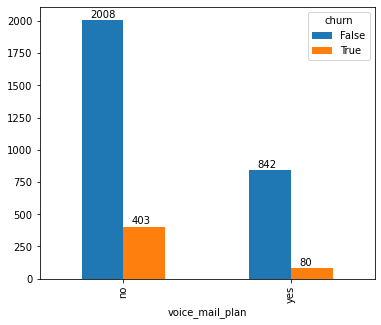

In [20]:
vp=df_telecom.groupby(["voice_mail_plan", "churn"]).size().unstack().plot(kind='bar', stacked=False,figsize=(6,5))
for i in vp.patches:
     vp.text(i.get_x()+0.05, i.get_height()+20,str(i.get_height()))

<span style= "color:green">**Ploting Numerical Columns**</span>

The following interactive graph shows the distribution of each feature for customer with churn and for the ones without churn. The slider can be used to switch between the different features.

In [21]:
#plot libaries
import plotly
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True) # to show plots in notebook

# offline plotly
from plotly.offline import plot, iplot

# do not show any warnings
import warnings
warnings.filterwarnings('ignore')

SEED = 17 # specify seed for reproducable results
pd.set_option('display.max_columns', None) # prevents abbreviation (with '...') of columns in prints

colors = plotly.colors.DEFAULT_PLOTLY_COLORS

churn = df_telecom[df_telecom["churn"] == 1]
no_churn = df_telecom[df_telecom["churn"] == 0]

def create_churn_trace(col, visible=False):
    return go.Histogram(
        x=churn[col],
        name='churn',
        marker = dict(color = colors[1]),
        visible=visible,
    )

def create_no_churn_trace(col, visible=False):
    return go.Histogram(
        x=no_churn[col],
        name='no churn',
        marker = dict(color = colors[0]),
        visible = visible,
    )

features_not_for_hist = ["state", "phone_number", "churn","area_code","international_plan","voice_mail_plan","state"]
features_for_hist = [x for x in df_telecom.columns if x not in features_not_for_hist]
active_idx = 0
traces_churn = [(create_churn_trace(col) if i != active_idx else create_churn_trace(col, visible=True)) for i, col in enumerate(features_for_hist)]
traces_no_churn = [(create_no_churn_trace(col) if i != active_idx else create_no_churn_trace(col, visible=True)) for i, col in enumerate(features_for_hist)]
data = traces_churn + traces_no_churn

n_features = len(features_for_hist)
steps = []
for i in range(n_features):
    step = dict(
        method = 'restyle',  
        args = ['visible', [False] * len(data)],
        label = features_for_hist[i],
    )
    step['args'][1][i] = True # Toggle i'th trace to "visible"
    step['args'][1][i + n_features] = True # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    active = active_idx,
    currentvalue = dict(
        prefix = "Feature: ", 
        xanchor= 'center',
    ),
    pad = {"t": 50},
    steps = steps,
)]

layout = dict(
    sliders=sliders,
    yaxis=dict(
        title='#samples',
        automargin=True,
    ),
)

fig = dict(data=data, layout=layout)

iplot(fig, filename='histogram_slider')

<b>Inference : </b><span style= "color:tomato">**The histograms for the "total_day_minutes" and "total_day_charge" are very similar and we can see that the customer with a higher value for these two features are more likely to churn. Interestingly, this does not apply to the number of day calls, which means that these customers seem to do longer calls. The minutes, charge and #calls for other times of the day (i.e. evening, night) do not show different distributions for customers with churn and without churn.**</span>
<br>
<b>Inference : </b><span style= "color:steelblue">**Another interesting pattern is shown by the "total_intl_calls" feature. The data for the customers with churn are more left skewed than the data of the customers of the customer who did not churn.**</span>

Outlier treatment : box plots

In [22]:
def create_box_churn_trace(col, visible=False):
    return go.Box(
        y=churn[col],
        name='churn',
        marker = dict(color = colors[1]),
        visible=visible,
    )

def create_box_no_churn_trace(col, visible=False):
    return go.Box(
        y=no_churn[col],
        name='no churn',
        marker = dict(color = colors[0]),
        visible = visible,
    )

features_not_for_hist = ["state", "phone_number", "churn","area_code","international_plan","voice_mail_plan","state"]
features_for_hist = [x for x in df_telecom.columns if x not in features_not_for_hist]
# remove features with too less distinct values (e.g. binary features), because boxplot does not make any sense for them
features_for_box = [col for col in features_for_hist if len(churn[col].unique())>5]

active_idx = 0
box_traces_churn = [(create_box_churn_trace(col) if i != active_idx else create_box_churn_trace(col, visible=True)) for i, col in enumerate(features_for_box)]
box_traces_no_churn = [(create_box_no_churn_trace(col) if i != active_idx else create_box_no_churn_trace(col, visible=True)) for i, col in enumerate(features_for_box)]
data = box_traces_churn + box_traces_no_churn

n_features = len(features_for_box)
steps = []
for i in range(n_features):
    step = dict(
        method = 'restyle',  
        args = ['visible', [False] * len(data)],
        label = features_for_box[i],
    )
    step['args'][1][i] = True # Toggle i'th trace to "visible"
    step['args'][1][i + n_features] = True # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    active = active_idx,
    currentvalue = dict(
        prefix = "Feature: ", 
        xanchor= 'center',
    ),
    pad = {"t": 50},
    steps = steps,
    len=1,
)]

layout = dict(
    sliders=sliders,
    yaxis=dict(
        title='value',
        automargin=True,
    ),
    legend=dict(
        x=0,
        y=1,
    ),
)

fig = dict(data=data, layout=layout)

iplot(fig, filename='box_slider')

<b>Inference : </b><br/>
    
- When we look at the box plot for the number of voice mail messages <b>("number_vmail_messages")</b>, we can see that we have some <b>outliers</b> for the customers with churn, but most of them have send zero voice mail messages. The customers which did not churn instead tend to do more voice mail messages.<br/>
- Similar to our findings in the histograms, we can see also in the box plot that the median of the total day minutes and the total day charge for churn clients is higher than the one of no-churn clients.
- Looking at the total international calls ("total_intl_calls"), the box plot shows that both churn and no-churn customers are doing a similar amount of international calls, but the churn-customers tend to do longer calls as the median of churn customers for the total international minutes is higher than for the no-churn customers.
- Finally, the plot for the number of customer service calls shows that clients with churn have a higher median and a higher variance for the customer service calls.

In [23]:
df_telecom.describe()

,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


<hr>

<span id="selection"></span>
# 4). Feature Selection

<b>Label encoding

In [24]:
# Copied the dataframe so that it is easy to backtrack if required
df = df_telecom

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

cate = [key for key in dict(df.dtypes) if dict(df.dtypes)[key] in ['bool', 'object']]

le = preprocessing.LabelEncoder()
for i in cate:
    le.fit(df[i])
    df[i] = le.transform(df[i])
    
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


**Ploting Heatmap to see Correlations btw Features**

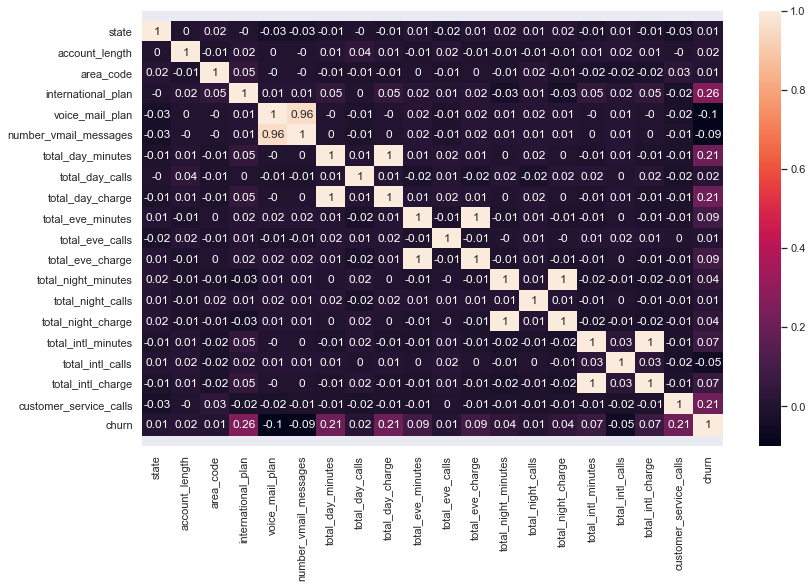

In [26]:
sns.set()
f, ax = plt.subplots(figsize=(13, 8))

#correlation btw Numeric column
correlation_matrix = df_telecom.corr().round(2)

# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True, ax=ax)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

<b>Inference : </b><br/>

<span style = "color:tomato">
    <b>
    
1. We can see a high correlation between the voice mail plan and the number of voice mail messages. It makes sense that customers with the voice mail plan also send more voice mail messages.
    
2. However, the international plan is just slightly correlated with the total international minutes and the international charge.
</b>
</span>
<br><span style = "color:green">
    <b>
As seen also in our previous analysis, the total day charge and the total day minutes a very highly correlated. Probably, this Telecom company charges per minute. The same behavior can be seen for the evening, the night and the international calls.
The highest correlation with the churn variable have the international plan, the total_day_charge, the total_day_minutes and the number of customer service calls.
        </b>
    </span>

In [28]:
df.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge', 'customer_service_calls',
       'churn'],
      dtype='object')

**This will be our final Features**

<hr>

<span id="model"></span>
# 5).  Model Training and Evaluation

* **The Data is heavily skewed. There are more data points for "No Attrition" and less for "Attrition".**

* **This can increase the precision of the model in predicting "No Attrition" case, but the model would perform poorly in the opposite case. This can be fixed by oversampling or downsampling.**

* **Since Downsampling would reduce our data to less than one-third, Let us upsample to retain valuable data.**

In [43]:
# x,y set's
y = df["churn"]
x = df.drop("churn", axis =1)

In [44]:
# performing
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

#split data into test and training sets
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.30, random_state=42)

#combine them back for resampling
train_data = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
negative = train_data[train_data.churn==0]
positive = train_data[train_data.churn==1]

# upsample minority
pos_upsampled = resample(positive,replace=True, # sample with replacement 
                         n_samples=len(negative), # match number in majority class
                         random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([negative, pos_upsampled])

# check new class counts
upsampled.churn.value_counts()

1    1993
0    1993
Name: churn, dtype: int64

**New Sample of Data**

In [50]:
y_new = upsampled.churn
x_new = upsampled.drop('churn', axis=1)

**Train-test split**

In [51]:
from sklearn.model_selection import train_test_split

x_train, x_test, Y_train, Y_test = train_test_split(x_new, y_new, test_size = 0.20,\
                                                    random_state=42, shuffle=True)

print("Training and testing split was successful.")

Training and testing split was successful.


In [52]:
# Target column:
Y_train

2753    0
3101    0
3159    0
1265    0
2053    0
       ..
2190    0
666     0
687     0
1934    1
1585    1
Name: churn, Length: 3188, dtype: int64

In [53]:
#Features
x_train

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
2753,35,134,415,0,0,0,7.8,86,1.33,171.4,100,14.57,186.5,80,8.39,12.9,2,3.48,2
3101,3,107,415,0,1,32,134.2,101,22.81,211.9,145,18.01,167.6,138,7.54,8.2,5,2.21,1
3159,28,27,415,0,0,0,227.4,67,38.66,248.0,115,21.08,61.4,109,2.76,7.8,6,2.11,1
1265,50,95,415,0,1,39,260.8,130,44.34,213.4,111,18.14,195.6,97,8.80,10.1,5,2.73,1
2053,44,104,408,0,0,0,263.4,101,44.78,235.5,117,20.02,102.0,146,4.59,13.0,4,3.51,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2190,27,88,408,0,1,27,93.4,106,15.88,252.0,92,21.42,189.0,104,8.50,10.9,1,2.94,1
666,37,120,415,0,0,0,252.0,120,42.84,150.2,106,12.77,151.8,96,6.83,9.6,1,2.59,2
687,40,108,510,0,0,0,187.4,101,31.86,199.9,126,16.99,216.1,107,9.72,12.6,8,3.40,1
1934,11,105,415,0,0,0,281.3,124,47.82,301.5,96,25.63,202.8,109,9.13,8.7,3,2.35,0


**All classification Algorithms**


<span style = "color:tomato">
    <b>

* LogisticRegression
* KNeighborsClassifier        
* DecisionTreeClassifier
* Random Forest
* AdaBoostClassifier
* GradientBoostingClassifier
* XGBClassifier
* MultinomialNB
* ExtraTreesClassifier

</b>
</span>

In [31]:
algo = pd.DataFrame(columns=["Algorithm","Accuracy","auc score"])
algo.head()

,Algorithm,Accuracy,auc score


**We'll be using this Datafrme to store algorithms, Accuracy and Auc Score**

<span style = "color:brown">
<b>
    Load Classification Packages and Accuracy Packages for the analysis

</b>
</span>

In [72]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier,RadiusNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC,SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

<span style = "color:brown">
<b>
Model 1: LogisticRegression
</b>
</span>

In [58]:
clf = LogisticRegression(C=1.0)
clf.fit(x_train, Y_train)
predictions = clf.predict(x_test)
print("accuracy_score",accuracy_score(Y_test, predictions))
print("auc",roc_auc_score(Y_test, predictions))

lr = pd.Series([clf.__class__,accuracy_score(Y_test, predictions),roc_auc_score(Y_test, predictions)],
              ["Algorithm","Accuracy","auc score"])

accuracy_score 0.6967418546365914
auc 0.6975810511478051


In [59]:
algo=algo.append([lr],ignore_index=True)

<span style = "color:brown">
<b>
Model 2: KNeighborsClassifier</b>
</span>

In [60]:
clf = KNeighborsClassifier()
clf.fit(x_train, Y_train)
predictions = clf.predict(x_test)
print("accuracy_score",accuracy_score(Y_test, predictions))
print("auc",roc_auc_score(Y_test, predictions))

knc = pd.Series([clf.__class__,accuracy_score(Y_test, predictions),roc_auc_score(Y_test, predictions)],
              ["Algorithm","Accuracy","auc score"])

accuracy_score 0.7982456140350878
auc 0.803495016109545


In [61]:
algo=algo.append([knc],ignore_index=True)

<span style = "color:brown">
<b>
Model 3: DecisionTreeClassifie</b>
</span>

In [62]:
# instantiate decision tree object with default params
dtc = DecisionTreeClassifier(max_depth = 5)

dtc.fit(x_train, Y_train)
pred = dtc.predict(x_test)
accur = accuracy_score(pred, Y_test)
print(accur)

# calculate recall_score for test data:
print(precision_score(Y_test, dtc.predict(x_test)))

# calculate recall_score for test data:
print(recall_score(Y_test, dtc.predict(x_test)))

dtc = pd.Series([dtc.__class__,accuracy_score(Y_test, pred),roc_auc_score(Y_test, pred)],
              ["Algorithm","Accuracy","auc score"])

0.87468671679198
0.9221556886227545
0.806282722513089


<span style= "color:green">
    <b>
        
* Well, you got a classification rate of 87%, considered as good accuracy.

* Precision: Precision is about being precise, i.e., how accurate your model is. In other words, you can say, when a model makes a prediction, how often it is correct. In your prediction case, when your Decision Tree Classifier model predicted customer churn, that means customers will churn 92% of the time.

* Recall: If there are customers who churned in the test set and your Decision Tree Classifier model can identify it 80% of the time.

Remember, for this problem, we care more about recall score since we want to catch false negatives. Recall is what we want to try to maximise from this model.
        </b>
    </span>

In [63]:
algo=algo.append([dtc],ignore_index=True)

<span style = "color:brown">
<b>
Model 4: Random Forest</b>
</span>

In [66]:
RF = RandomForestClassifier(n_estimators = 100, max_depth= 5)
RF.fit(x_train, Y_train)

# prediction
pred =RF.predict(x_test)

# model eveluation
print("Accuracy:",accuracy_score(Y_test, pred))
print("Precision:",precision_score(Y_test, pred))
print("Recall:",recall_score(Y_test, pred))

rf = pd.Series([RF.__class__,accuracy_score(Y_test, pred),roc_auc_score(Y_test, pred)],
              ["Algorithm","Accuracy","auc score"])

Accuracy: 0.87468671679198
Precision: 0.9196428571428571
Recall: 0.8089005235602095


<span style = "color:steelblue">
    <b>
        
* We got a classification rate of 87%, considered as good accuracy.
        
* Precision: Precision is about being precise, i.e., how accurate your model is. In other words, you can say, when a model makes a prediction, how often it is correct. In your prediction case, when your Random forest Classifier model predicted customer churn, that means customers will churn 91% of the time.

* Recall: If there are customers who churned in the test set and your Random forest Classifier model can identify it 81% of the time.

Remember, for this problem, we care more about recall score since we want to catch false negatives. Recall is what we want to try to maximise from this model.
        </b>
    </span>

In [67]:
algo=algo.append([rf],ignore_index=True)

<span style = "color:brown">
<b>
Model 5: GradientBoostingClassifier</b>
</span>

In [69]:
# instantiate gradient boost classifier object
GBC = GradientBoostingClassifier(random_state = 15)

# fit the model to the training data:
GBC.fit(x_train, Y_train)

# prediction
pred =GBC.predict(x_test)

# model eveluation
print("Accuracy:",accuracy_score(Y_test, pred))
print("Precision:",precision_score(Y_test, pred))
print("Recall:",recall_score(Y_test, pred))

GBC = pd.Series([GBC.__class__,accuracy_score(Y_test, pred),roc_auc_score(Y_test, pred)],
              ["Algorithm","Accuracy","auc score"])

Accuracy: 0.8947368421052632
Precision: 0.9331395348837209
Recall: 0.8403141361256544


<span styles = "color:blue">
    <b>
        
* Well, you got a classification rate of 87%, considered as good accuracy. 
        
* Precision: Precision is about being precise, i.e., how accurate your model is. In other words, you can say, when a model makes a prediction, how often it is correct. In your prediction case, when your GradientBoosting Classifier model predicted customer churn, that means customers will churn 91% of the time.
        
* Recall: If there are customers who churned in the test set and your GradientBoosting Classifier model can identify it 81% of the time.

Remember, for this problem, we care more about recall score since we want to catch false negatives. Recall is what we want to try to maximise from this model.
        </b>
        </span>

In [70]:
algo=algo.append([GBC],ignore_index=True)

<span style = "color:brown">
<b>
Model 6: XGBClassifier</b>
</span>

In [73]:
clf = xgb.XGBClassifier(max_depth=7, n_estimators=200, colsample_bytree=0.8, 
                        subsample=0.8, nthread=10, learning_rate=0.1)
clf.fit(x_train, Y_train)
predictions = clf.predict(x_test)
print("accuracy_score",accuracy_score(Y_test, predictions))
print("auc",roc_auc_score(Y_test, predictions))

xg = pd.Series([clf.__class__,accuracy_score(Y_test, predictions),roc_auc_score(Y_test, predictions)],
              ["Algorithm","Accuracy","auc score"])

accuracy_score 0.9849624060150376
auc 0.985576923076923


In [74]:
algo=algo.append([xg],ignore_index=True)

<span style = "color:brown">
<b>
Model 7: MultinomialNB</b>
</span>

In [75]:
clf = MultinomialNB()
clf.fit(x_train, Y_train)
predictions = clf.predict(x_test)
print("accuracy_score",accuracy_score(Y_test, predictions))
print("auc",roc_auc_score(Y_test, predictions))

mnb = pd.Series([clf.__class__,accuracy_score(Y_test, predictions),roc_auc_score(Y_test, predictions)],
              ["Algorithm","Accuracy","auc score"])

accuracy_score 0.5714285714285714
auc 0.572253826016915


In [76]:
algo=algo.append([mnb],ignore_index=True)

<span style = "color:brown">
<b>
Model 8: AdaBoostClassifier</b>
</span>

In [77]:
# instantiate adaboost classifier object
ABC = AdaBoostClassifier(random_state = 15)

# fit the model to the training data:
ABC.fit(x_train, Y_train)

# prediction
pred =ABC.predict(x_test)

# model eveluation
print("Accuracy:",accuracy_score(Y_test, pred))
print("Precision:",precision_score(Y_test, pred))
print("Recall:",recall_score(Y_test, pred))

abc = pd.Series([ABC.__class__,accuracy_score(Y_test, pred),roc_auc_score(Y_test, pred)],
              ["Algorithm","Accuracy","auc score"])

Accuracy: 0.8170426065162907
Precision: 0.8296089385474861
Recall: 0.7774869109947644


In [78]:
algo=algo.append([abc],ignore_index=True)

<span style = "color:brown">
<b>
Model 9: ExtraTreesClassifier</b>
</span>

In [79]:
clf = ExtraTreesClassifier()
clf.fit(x_train, Y_train)
predictions = clf.predict(x_test)
print("accuracy_score",accuracy_score(Y_test, predictions))
print("auc",roc_auc_score(Y_test, predictions))

etc = pd.Series([clf.__class__,accuracy_score(Y_test, predictions),roc_auc_score(Y_test, predictions)],
              ["Algorithm","Accuracy","auc score"])

accuracy_score 0.9849624060150376
auc 0.984721103503826


In [80]:
algo=algo.append([etc],ignore_index=True)

<hr>

<span id="compare"></span>
# 6). Comparing Algorithms

**We'll be comaparing the Model's, to see which outperform other**

In [81]:
algo.sort_values(["Accuracy"], ascending=[False])

,Algorithm,Accuracy,auc score
5,<class 'xgboost.sklearn.XGBClassifier'>,0.984962,0.985577
8,<class 'sklearn.ensemble._forest.ExtraTreesCla...,0.984962,0.984721
4,<class 'sklearn.ensemble._gb.GradientBoostingC...,0.894737,0.892513
2,<class 'sklearn.tree._classes.DecisionTreeClas...,0.874687,0.871891
3,<class 'sklearn.ensemble._forest.RandomForestC...,0.874687,0.871998
7,<class 'sklearn.ensemble._weight_boosting.AdaB...,0.817043,0.815426
1,<class 'sklearn.neighbors._classification.KNei...,0.798246,0.803495
0,<class 'sklearn.linear_model._logistic.Logisti...,0.696742,0.697581
6,<class 'sklearn.naive_bayes.MultinomialNB'>,0.571429,0.572254


<hr>

<span id="conclusion"></span>
# 7). Conclusion

<span style = "color: red">
    <b>
Given these 9 models, we would choose the gradient boosting model as our best based on prediction accuracy and auc score.
        </b>
    </span>